In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [2]:
data = pd.read_csv('clean_data.csv')
data

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ASY,ATA,NAP,TA,LVH,Normal,ST,HeartDisease
0,0.747511,1,0.70,0.479270,0,0.851485,0,0.0,1,0,1,0,0,0,1,0,0
1,0.915701,0,0.80,0.298507,0,0.772277,0,1.0,0,0,0,1,0,0,1,0,1
2,0.691448,1,0.65,0.469320,0,0.485149,0,0.0,1,0,1,0,0,0,0,1,0
3,0.897014,0,0.69,0.354892,0,0.534653,1,1.5,0,1,0,0,0,0,1,0,1
4,1.009140,1,0.75,0.323383,0,0.603960,0,0.0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.840950,1,0.55,0.437811,0,0.653465,0,1.2,0,0,0,0,1,0,1,0,1
914,1.270769,1,0.72,0.320066,1,0.698020,0,3.4,0,1,0,0,0,0,1,0,1
915,1.065204,1,0.65,0.217247,0,0.569307,1,1.2,0,1,0,0,0,0,1,0,1
916,1.065204,0,0.65,0.391376,0,0.861386,0,0.0,0,0,1,0,0,1,0,0,1


In [3]:
x, y = data.loc[:,:"ST"].values, data['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(x, y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((688, 16), (230, 16), (688,), (230,))

In [12]:
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [5]:
x_train[0].shape

(16,)

In [68]:
model = keras.Sequential([
    Dense(128, input_shape=(16,), activation='tanh'),
    Dropout(0.3),
    Dense(64, activation='tanh'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               2176      
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 2)                 130       
                                                                 
Total params: 10,562
Trainable params: 10,562
Non-trainable params: 0
_________________________________________________________________
None


In [69]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01,
                                                                                  beta_1=0.9,
                                                                                  beta_2=0.999,), metrics=['accuracy'])

In [70]:
log = model.fit(x_train, y_train_cat, epochs=100, batch_size=16, validation_data=(x_test, y_test_cat), verbose=True)

Epoch 1/100
43/43 [==============================] - 2s 16ms/step - loss: 0.4963 - accuracy: 0.8023 - val_loss: 0.3199 - val_accuracy: 0.8565
Epoch 2/100
43/43 [==============================] - 0s 7ms/step - loss: 0.3740 - accuracy: 0.8459 - val_loss: 0.4132 - val_accuracy: 0.8043
Epoch 3/100
43/43 [==============================] - 0s 7ms/step - loss: 0.3872 - accuracy: 0.8474 - val_loss: 0.3935 - val_accuracy: 0.8435
Epoch 4/100
43/43 [==============================] - 0s 7ms/step - loss: 0.3666 - accuracy: 0.8445 - val_loss: 0.3182 - val_accuracy: 0.8696
Epoch 5/100
43/43 [==============================] - 0s 6ms/step - loss: 0.3734 - accuracy: 0.8488 - val_loss: 0.4191 - val_accuracy: 0.8217
Epoch 6/100
43/43 [==============================] - 0s 7ms/step - loss: 0.3963 - accuracy: 0.8270 - val_loss: 0.3447 - val_accuracy: 0.8478
Epoch 7/100
43/43 [==============================] - 0s 7ms/step - loss: 0.3699 - accuracy: 0.8488 - val_loss: 0.3196 - val_accuracy: 0.8739
Epoch 8/100


Epoch 59/100
43/43 [==============================] - 0s 7ms/step - loss: 0.3193 - accuracy: 0.8735 - val_loss: 0.3129 - val_accuracy: 0.8652
Epoch 60/100
43/43 [==============================] - 0s 7ms/step - loss: 0.3393 - accuracy: 0.8721 - val_loss: 0.2938 - val_accuracy: 0.8870
Epoch 61/100
43/43 [==============================] - 0s 7ms/step - loss: 0.3454 - accuracy: 0.8663 - val_loss: 0.3545 - val_accuracy: 0.8478
Epoch 62/100
43/43 [==============================] - 0s 7ms/step - loss: 0.3736 - accuracy: 0.8547 - val_loss: 0.2995 - val_accuracy: 0.8783
Epoch 63/100
43/43 [==============================] - 0s 7ms/step - loss: 0.3248 - accuracy: 0.8619 - val_loss: 0.3140 - val_accuracy: 0.8696
Epoch 64/100
43/43 [==============================] - 0s 7ms/step - loss: 0.3387 - accuracy: 0.8619 - val_loss: 0.2990 - val_accuracy: 0.8870
Epoch 65/100
43/43 [==============================] - 0s 7ms/step - loss: 0.3207 - accuracy: 0.8619 - val_loss: 0.2909 - val_accuracy: 0.8826
Epoch 

In [71]:
log.history

{'loss': [0.4963442385196686,
  0.37404823303222656,
  0.38723236322402954,
  0.36662477254867554,
  0.3734084367752075,
  0.39625197649002075,
  0.36993831396102905,
  0.36018288135528564,
  0.37935903668403625,
  0.3722982108592987,
  0.37057098746299744,
  0.3653906583786011,
  0.40293896198272705,
  0.34599170088768005,
  0.3836454749107361,
  0.3713700771331787,
  0.36685681343078613,
  0.3888717591762543,
  0.3777659237384796,
  0.3642190098762512,
  0.3518132269382477,
  0.3565611243247986,
  0.34986239671707153,
  0.3266199827194214,
  0.3384701907634735,
  0.3833748996257782,
  0.3398343324661255,
  0.380038321018219,
  0.3346691429615021,
  0.3326150178909302,
  0.35248294472694397,
  0.3378775119781494,
  0.33082202076911926,
  0.36005672812461853,
  0.3306763768196106,
  0.3458763062953949,
  0.3247549533843994,
  0.33776822686195374,
  0.3469633162021637,
  0.3368997573852539,
  0.3418385088443756,
  0.3303350508213043,
  0.376891165971756,
  0.32401442527770996,
  0.35032

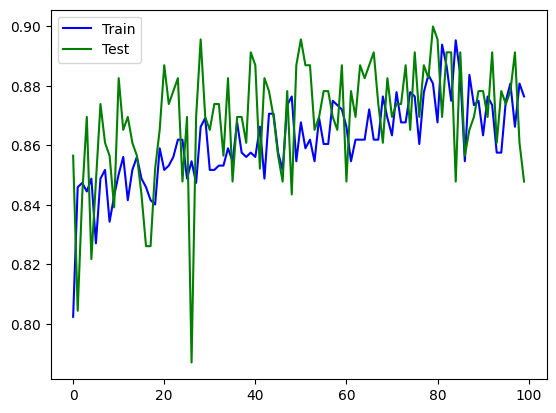

In [72]:
plt.plot(log.history["accuracy"], c='b', label='Train')
plt.plot(log.history["val_accuracy"], c='g', label="Test")
plt.legend();

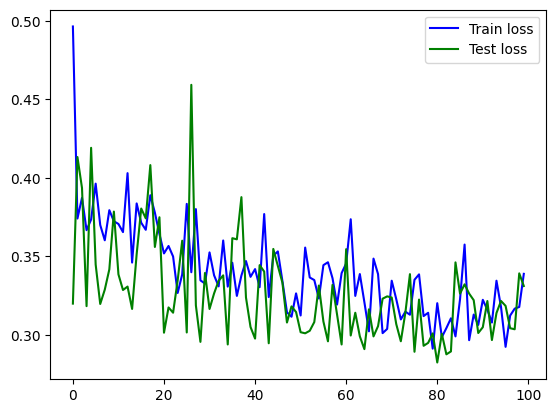

In [73]:
plt.plot(log.history["loss"], c='b', label='Train loss')
plt.plot(log.history["val_loss"], c='g', label="Test loss")
plt.legend();

In [76]:
np.array(log.history["accuracy"]).mean()

0.8617877942323685

In [75]:
np.array(log.history["val_accuracy"]).mean()

0.8688695603609085